# Netflix Dataset

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## Business Problem

1.Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce.
 
 
2.How they can grow the business in different countries.

## Dataset Preview

### Accessing the modules

In [255]:
# import required modules for the analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

To Load the Dataset, we have to use the Pandas function  **pd.read_csv()**  and  **head()**  will the show the dataset (First Five records).

In [256]:
data = pd.read_csv("Netflix_Dataset.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Analyzing Each Columns

• Show_id : Unique ID for every Movie / Tv Show

• Type : Identifier - A Movie or TV Show

• Title : Title of the Movie / Tv Show

• Director : Director of the Movie

• Cast : Actors involved in the movie/Tv show

• Country : Country where the movie/Tv show was produced

• Date_added : Date it was added on Netflix

• Release_year : Actual Release year of the movie/Tv show

• Rating : TV Rating of the movie/Tv show

• Duration : Total Duration - in minutes or number of seasons

• Listed_in : Genre

• Description : The summary description

### Shape

In [257]:
data.shape

(8807, 12)

**Shape of the Data :**  8807 rows and 12 Columns

### Dimension

In [258]:
data.ndim

2

**Dimension of the Data :**  2 Dimension

### Information about Data types

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Data Type :** Except release_year, all of them are ***objects*** (String). release_year is in ***int64*** (Integer) 

### Information about the Null Values

In [260]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Null Values :** 

1.Director, Cast, Country has most number of null values.

2.data_added, rating , duration has least number of null values.

### Summary of Descriptive Statistics

#### Numerical :-

In [261]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Insights :** 

1.The release of tv - shows and Movies are Minimum in the year 1925 to 2013. 

2.After 2013 there is a increasing trend in the release of tv-shows and Movies.

#### Categorical :-

In [262]:
data.describe(include = "object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


**Insights :**

1.There are only two unique vales in the type columns **Movie and Tv-show**.

2.Movies are Dominating the release count compared to Tv-shows.

3.**United states** has the record of most releases (**Count** : 2818).

### Information About the Duplicate Values

In [263]:
data.duplicated().any()

False

**Duplicates :** There is no Duplicate Values in the Dataset.

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Data Cleaning Process

### Handling Missing Values

We have to treat the categorical missing values with the mode function to fill.

In [264]:
data["director"].fillna(data["director"].mode()[0],inplace = True )

In [265]:
data["cast"].fillna(data["cast"].mode()[0],inplace = True )

In [266]:
data["country"].fillna(data["country"].mode()[0],inplace = True )

In [267]:
data["date_added"].fillna(data["date_added"].mode()[0],inplace = True )

In [268]:
data["rating"].fillna(data["rating"].mode()[0],inplace = True )

In [269]:
data["duration"].fillna(data["duration"].mode()[0],inplace = True )

### After handling missing values 

In [270]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [271]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

After handling the missing values, there is no null values shown

### Performing Type conversion

Ensuring the data types are appropriately adjusted facilitates smoother data analysis.

1.Type - Covert this to **category**.

2.date_added - Convert this to **datetime64**.

In [272]:
data["type"] = data["type"].astype("category")

In [273]:
data["date_added"] = pd.to_datetime(data["date_added"])

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(9)
memory usage: 765.7+ KB


### Performing Datetime Decomposition

We have to separate the  **date_added**  column into Date, Month, Year, and Days for better analysis.

In [275]:
data["Date"] = data["date_added"].dt.day
data["Month"] = data["date_added"].dt.month_name()
data["Year"] = data["date_added"].dt.year
data["Days"] = data["date_added"].dt.day_name()
data.drop(columns = "date_added",inplace = True)

data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Date,Month,Year,Days
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,September,2021,Saturday
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,September,2021,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,September,2021,Friday
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,September,2021,Friday
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,September,2021,Friday


### Unwrap the records in Director, Cast, Country, Listed_in  columns

In some specific columns, there are some records grouped within a single cell. Aim to unwrap these records to facilitate more effective analysis.

### Director

In [276]:
unwrap_dir = data["director"].str.split(", ",expand = True).set_index(data["show_id"])
unwrap_dir = pd.DataFrame(unwrap_dir.stack())
unwrap_dir.reset_index(inplace = True)
unwrap_dir = unwrap_dir[["show_id",0]]
unwrap_dir.columns = ["show_id","Director"]
unwrap_dir.head()

,show_id,Director
0,s1,Kirsten Johnson
1,s2,Rajiv Chilaka
2,s3,Julien Leclercq
3,s4,Rajiv Chilaka
4,s5,Rajiv Chilaka


### Cast

In [277]:
unwrap_cast = data["cast"].str.split(", ",expand = True).set_index(data["show_id"])
unwrap_cast = pd.DataFrame(unwrap_cast.stack())
unwrap_cast.reset_index(inplace = True)
unwrap_cast = unwrap_cast[["show_id",0]]
unwrap_cast.columns = ["show_id","Cast"]
unwrap_cast.head()

,show_id,Cast
0,s1,David Attenborough
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba


### Country

In [278]:
unwrap_country = data["country"].str.split(", ",expand = True).set_index(data["show_id"])
unwrap_country = pd.DataFrame(unwrap_country.stack())
unwrap_country.reset_index(inplace = True)
unwrap_country = unwrap_country[["show_id",0]]
unwrap_country.columns = ["show_id","Country"]
unwrap_country.head()

,show_id,Country
0,s1,United States
1,s2,South Africa
2,s3,United States
3,s4,United States
4,s5,India


### Genre (Listed_in)

In [279]:
unwrap_genre = data["listed_in"].str.split(", ",expand = True).set_index(data["show_id"])
unwrap_genre = pd.DataFrame(unwrap_genre.stack())
unwrap_genre.reset_index(inplace = True)
unwrap_genre = unwrap_genre[["show_id",0]]
unwrap_genre.columns = ["show_id","Genre"]
unwrap_genre.head()

,show_id,Genre
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows


### Merge Unwrapped List Data

Group these individual unwrapped data into single data.

In [280]:
merge_data = unwrap_dir.merge(unwrap_cast, how = "inner", on = "show_id")
merge_data = merge_data.merge(unwrap_country, how = "inner",on = "show_id")
merge_data = merge_data.merge(unwrap_genre, how = "inner",on = "show_id")

merge_data.head()

,show_id,Director,Cast,Country,Genre
0,s1,Kirsten Johnson,David Attenborough,United States,Documentaries
1,s2,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows
2,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas
3,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries
4,s2,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows


### Merge to Original Data

Merge the unwrapped table with the original table with the help of **show_id**.

In [281]:
final_data = data.merge(merge_data,how = "inner",on = "show_id",suffixes = ("_df1","_df2"))

final_data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Date,Month,Year,Days,Director,Cast,Country,Genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,September,2021,Saturday,Kirsten Johnson,David Attenborough,United States,Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,September,2021,Friday,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,September,2021,Friday,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,September,2021,Friday,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,September,2021,Friday,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows


### Drop Unwanted Columns in the Dataset 

Remove the duplicated columns in the Dataset.

In [282]:
final_data.drop(columns = ["director","cast","country","listed_in"],axis = 1,inplace = True)

final_data.head()

,show_id,type,title,release_year,rating,duration,description,Date,Month,Year,Days,Director,Cast,Country,Genre
0,s1,Movie,Dick Johnson Is Dead,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",25,September,2021,Saturday,Kirsten Johnson,David Attenborough,United States,Documentaries
1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,September,2021,Friday,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,September,2021,Friday,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,September,2021,Friday,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,September,2021,Friday,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows


In [283]:
final_data = final_data.reindex(columns = ["show_id","type","title","Director","Cast","Country","release_year","rating","duration","Date","Month","Year","Days","Genre","description"])
final_data.head()

,show_id,type,title,Director,Cast,Country,release_year,rating,duration,Date,Month,Year,Days,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2020,PG-13,90 min,25,September,2021,Saturday,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [284]:
final_data.shape

(201991, 15)

In [285]:
final_data.ndim

2

In [286]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   show_id       201991 non-null  object  
 1   type          201991 non-null  category
 2   title         201991 non-null  object  
 3   Director      201991 non-null  object  
 4   Cast          201991 non-null  object  
 5   Country       201991 non-null  object  
 6   release_year  201991 non-null  int64   
 7   rating        201991 non-null  object  
 8   duration      201991 non-null  object  
 9   Date          201991 non-null  int64   
 10  Month         201991 non-null  object  
 11  Year          201991 non-null  int64   
 12  Days          201991 non-null  object  
 13  Genre         201991 non-null  object  
 14  description   201991 non-null  object  
dtypes: category(1), int64(3), object(11)
memory usage: 23.3+ MB


In [287]:
final_data.isnull().sum()

show_id         0
type            0
title           0
Director        0
Cast            0
Country         0
release_year    0
rating          0
duration        0
Date            0
Month           0
Year            0
Days            0
Genre           0
description     0
dtype: int64

In [288]:
final_data.duplicated().sum()

55

### Drop Duplicate Records

There are around 55 number of duplicate records found in the dataset.We have to eliminate or remove that.

In [289]:
final_data.drop_duplicates(inplace = True)

In [290]:
final_data.duplicated().sum()

0

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Final Dataset

In [291]:
final_data.head()

,show_id,type,title,Director,Cast,Country,release_year,rating,duration,Date,Month,Year,Days,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2020,PG-13,90 min,25,September,2021,Saturday,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,International TV Shows,"After crossing paths at a party, a Cape Town t..."


### Analyzing Each Columns

• Show_id : Unique ID for every Movie / Tv Show

• Type : Identifier - A Movie or TV Show

• Title : Title of the Movie / Tv Show

• Director : Director of the Movie

• Cast : Actors involved in the movie/Tv show

• Country : Country where the movie/Tv show was produced

• Date : Movie/Tv-show added Date

• Month : Movie/Tv-show added Month

• Year : Movie/Tv-show added Year

• Days : Movie/Tv-show added Day

• Release_year : Actual Release year of the movie/Tv show

• Rating : TV Rating of the movie/Tv show

• Duration : Total Duration - in minutes or number of seasons

• Listed_in : Genre

• Description : The summary description

### Shape of the Data

In [292]:
final_data.shape

(201936, 15)

**Shape :** There are 201936 rows and 15 columns.

In [293]:
final_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,201936.0,2013.452277,9.003761,1925.0,2012.0,2016.0,2019.0,2021.0
Date,201936.0,12.173134,9.848941,1.0,1.0,12.0,20.0,31.0
Year,201936.0,2018.965969,1.551567,2008.0,2018.0,2019.0,2020.0,2021.0


In [294]:
final_data.describe(include = "object")

,show_id,title,Director,Cast,Country,rating,duration,Month,Days,Genre,description
count,201936,201936,201936,201936,201936,201936,201936,201936,201936,201936,201936
unique,8807,8807,4993,36439,127,17,220,12,7,42,8775
top,s7165,Kahlil Gibran's The Prophet,Rajiv Chilaka,David Attenborough,United States,TV-MA,1 Season,July,Friday,Dramas,A troubled young girl and her mother find sola...
freq,700,700,50790,2249,71221,73886,35038,20276,57977,29756,700


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Exploratory Data Analysis

In [295]:
final_data.head()

,show_id,type,title,Director,Cast,Country,release_year,rating,duration,Date,Month,Year,Days,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2020,PG-13,90 min,25,September,2021,Saturday,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,2021,TV-MA,2 Seasons,24,September,2021,Friday,International TV Shows,"After crossing paths at a party, a Cape Town t..."


#### Type

In [296]:
value_type = final_data.groupby(["type"])["show_id"].nunique().to_frame().reset_index()
value_type.rename(columns = {"type":"Type","show_id":"Count"},inplace = True)
value_type.sort_values(by = "Count",ascending = False,inplace = True)
value_type.head()

,Type,Count
0,Movie,6131
1,TV Show,2676


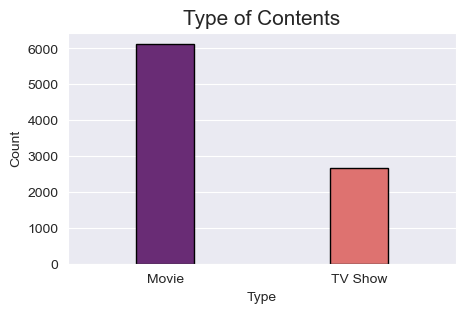

In [297]:
sns.set_style("darkgrid")

plt.figure(figsize = (5,3))

sns.barplot(data = value_type,x = "Type",y = "Count",width = 0.3,palette = "magma",ec = "k")
plt.title("Type of Contents",fontdict = {"family":"Arial","size":15})
plt.xlabel("Type",fontdict = {"family":"Arial","size":10})
plt.ylabel("Count",fontdict = {"family":"Arial","size":10})
plt.show()

**Insights :** 

1.There 6131 Movies and 2676 Tv-shows in the data.

2.Movies are the most dominating one in this data.

#### Director

In [298]:
value_director = final_data.groupby(["Director"])["show_id"].nunique().to_frame().reset_index()
value_director.rename(columns = {"show_id":"Count"},inplace = True)
value_director.sort_values(by = "Count",ascending = False,inplace = True)
value_director.head()

,Director,Count
3749,Rajiv Chilaka,2656
1906,Jan Suter,21
3800,Raúl Campos,19
4457,Suhas Kadav,16
2866,Marcus Raboy,16


**Insights :** 

1.These are the Top 5 Directors who directes most number of Movies or Tv-shows.

2.Among these Rajiv Chilaka directes the most number of Movies/Tv-shows.

#### Cast

In [299]:
value_cast = final_data.groupby(["Cast"])["show_id"].nunique().to_frame().reset_index()
value_cast.rename(columns = {"show_id":"Count"},inplace = True)
value_cast.sort_values(by = "Count",inplace = True,ascending = False)
value_cast.head()

,Cast,Count
7832,David Attenborough,845
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
32591,Takahiro Sakurai,32


**Insights :** 

1.These are the Top 5 Cast who acts most number of Movies or Tv-shows.

2.Among these David Attenborough acts the most number of Movies/Tv-shows.

#### Country

In [300]:
value_country = final_data.groupby(["Country"])["show_id"].nunique().to_frame().reset_index()
value_country.rename(columns = {"show_id":"Count"},inplace = True)
value_country.sort_values(by = "Count",inplace = True,ascending = False)
value_country.head()

,Country,Count
119,United States,4520
47,India,1046
117,United Kingdom,804
22,Canada,445
38,France,393


**Insights :** 

1.These are the Top 5 Countries with most number of releases.

2.Among these United States have the most number of releases.

#### Genre

In [301]:
value_genre = final_data.groupby(["Genre"])["show_id"].nunique().to_frame().reset_index()
value_genre.rename(columns = {"show_id":"Count"},inplace = True)
value_genre.sort_values(by = "Count",inplace = True,ascending = False)
value_genre.head(10)

,Genre,Count
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


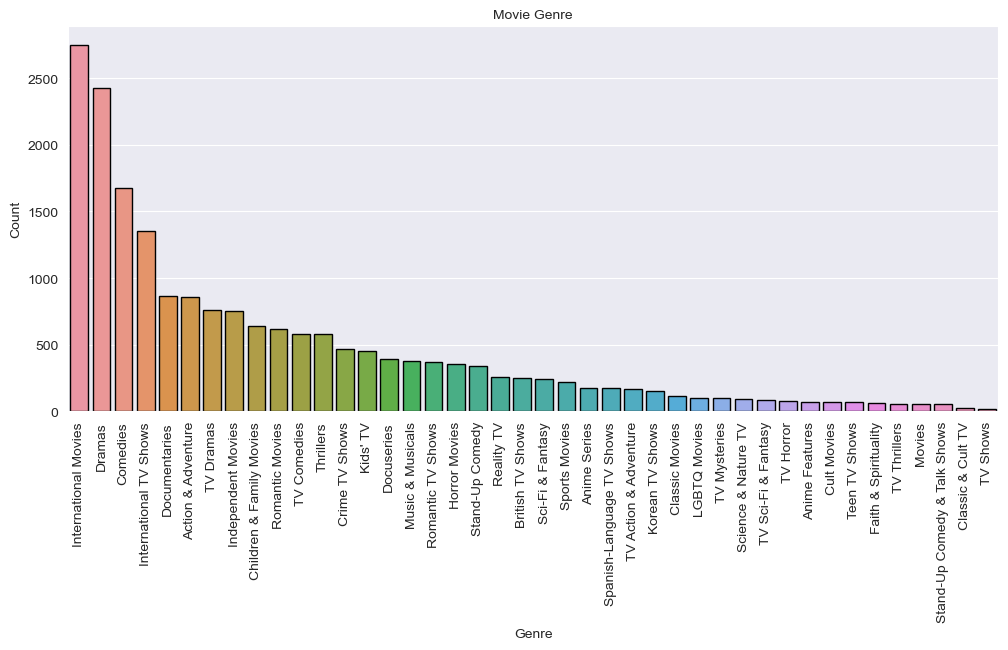

In [302]:
plt.figure(figsize=(12,5))
plt.title("Movie Genre",fontdict = {"family":"Arial","size":10})
sns.barplot(data = value_genre,x = "Genre",y = "Count",ec = "k")
plt.xticks(rotation = 90)
plt.show()

**Insights :** 

1.More Number of Movies released in the Genre International Movies.


#### Ratings

In [303]:
value_rating = final_data.groupby(["rating"])["show_id"].nunique().to_frame().reset_index()
value_rating.rename(columns = {"show_id":"Count"},inplace = True)
value_rating.sort_values(by = "Count",inplace = True,ascending = False)
value_rating.head()

,rating,Count
11,TV-MA,3211
9,TV-14,2160
12,TV-PG,863
8,R,799
7,PG-13,490


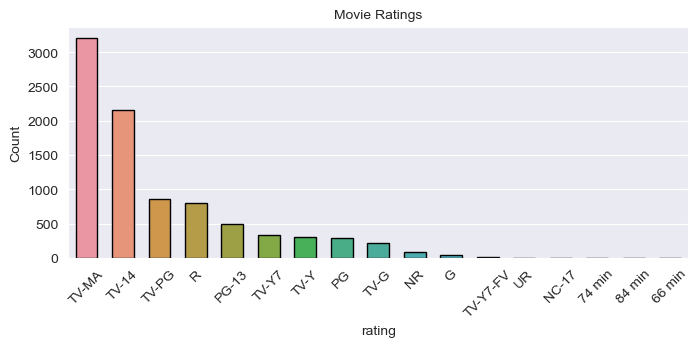

In [304]:

plt.figure(figsize=(8,3))
plt.title("Movie Ratings",fontdict = {"family":"Arial","size":10})
sns.barplot(data = value_rating,x = "rating",y = "Count",width = 0.6,ec = "k")
plt.xticks(rotation = 45)
plt.show()

**Insight :**

1.Most Number of Movies or tv shows taken with the ratings TV-MA.

#### Release Year

In [305]:
value_release_year = final_data.groupby(["release_year"])["show_id"].nunique().to_frame().reset_index()
value_release_year.rename(columns = {"show_id":"Count"},inplace = True)
value_release_year.sort_values(by = "Count",inplace = True,ascending = False)
value_release_year.head()

,release_year,Count
70,2018,1147
69,2017,1032
71,2019,1030
72,2020,953
68,2016,902


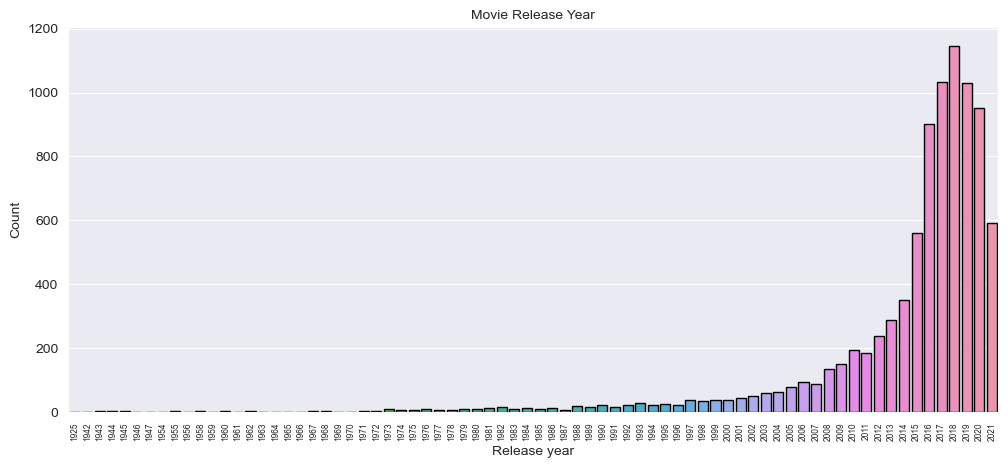

In [306]:
sns.set_style("darkgrid")

plt.figure(figsize = (12,5))
sns.barplot(data = value_release_year,x = "release_year",y = "Count",ec = "k")
plt.title("Movie Release Year",fontdict = {"family":"Arial","size":10})
plt.xlabel("Release year",fontdict = {"family":"Arial","size":10})
plt.ylabel("Count",fontdict = {"family":"Arial","size":10})
plt.xticks(rotation = 90,fontsize = 6)
plt.show()

**Insights :**

1.There is a gradual increase starts from the year 2008.

2.More Number of Movies or Tv shows released in the year 2018.

#### Added Month

In [307]:
value_month = final_data.groupby(["Month"])["show_id"].nunique().to_frame().reset_index()
value_month.rename(columns = {"show_id":"Count"},inplace = True)
value_month.sort_values(by = "Count",inplace = True,ascending = False)
value_month.transpose()

,5,2,11,0,10,1,4,7,6,9,8,3
Month,July,December,September,April,October,August,January,March,June,November,May,February
Count,827,813,770,764,760,755,748,742,728,705,632,563


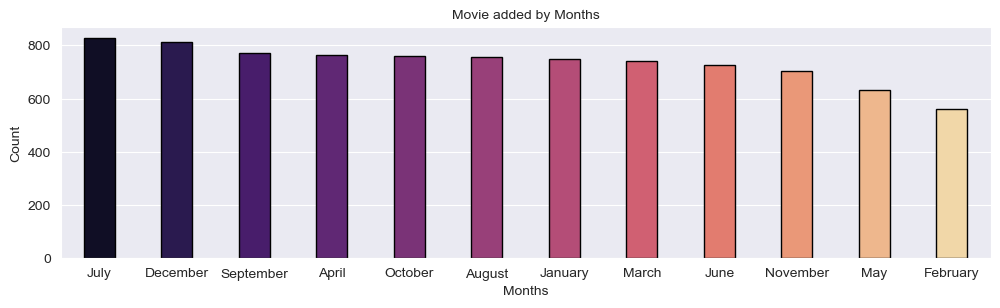

In [308]:
plt.figure(figsize = (12,3))
sns.barplot(data = value_month,x = "Month",y = "Count",palette = "magma",width = 0.4,ec = "k")
plt.title("Movie added by Months",{"family":"Arial","size":10})
plt.xlabel("Months",fontdict = {"family":"Arial","size":10})
plt.ylabel("Count",fontdict = {"family":"Arial","size":10})
plt.xticks(rotation = 0)
plt.show()

**Insights :** 

1.More number of Movies and Tv-shows added in the month July and December.

2.Less number of Movies and Tv-shows added in the month February and May.

#### Added Year

In [309]:
value_year = final_data.groupby(["Year"])["show_id"].nunique().to_frame().reset_index()
value_year.rename(columns = {"show_id":"Count"},inplace = True)
value_year.sort_values(by = "Count",inplace = True,ascending = False)
value_year.head()

,Year,Count
11,2019,2016
12,2020,1889
10,2018,1649
13,2021,1498
9,2017,1188


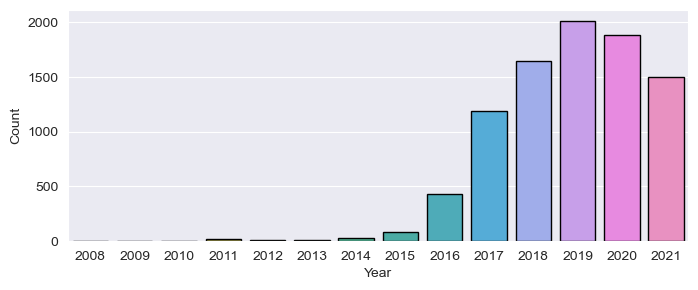

In [310]:
plt.figure(figsize=(8,3))
sns.barplot(data = value_year,x = "Year",y = "Count",ec = "k")
plt.show()

**Insights :**

1.There are more number of Movies or Tv shows added in the year 2019.

#### Added Day

In [311]:
value_days = final_data.groupby(["Days"])["show_id"].nunique().to_frame().reset_index()
value_days.rename(columns = {"show_id":"Count"},inplace = True)
value_days.sort_values(by = "Count",inplace = True,ascending = False)
value_days

,Days,Count
0,Friday,2498
4,Thursday,1396
6,Wednesday,1298
5,Tuesday,1197
1,Monday,851
2,Saturday,816
3,Sunday,751


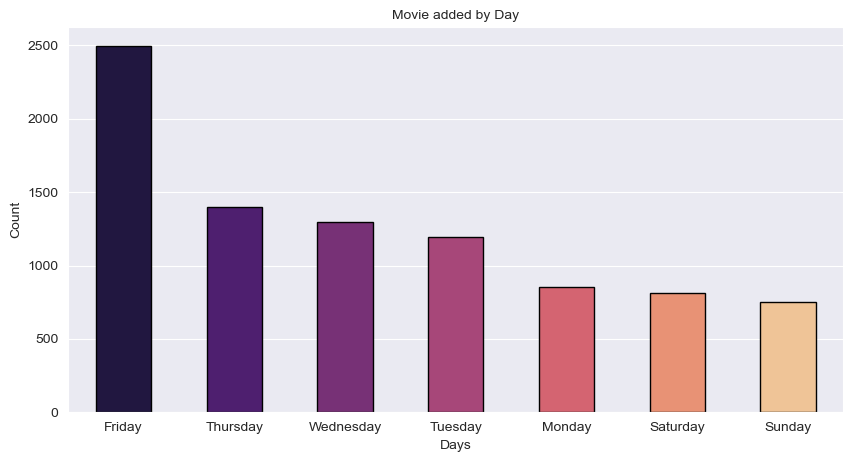

In [312]:
plt.figure(figsize = (10,5))
sns.barplot(data = value_days,x = "Days",y = "Count",palette = "magma",width = 0.5,ec = "k")
plt.title("Movie added by Day",{"family":"Arial","size":10})
plt.xlabel("Days",fontdict = {"family":"Arial","size":10})
plt.ylabel("Count",fontdict = {"family":"Arial","size":10})
plt.show()

**Insights :**

1.Most number of Movies or Tv shows added in Friday.

2.Least number of  Movies or Tv shows added in Sunday.

#### Genre and Director Relation :-

In [313]:
gd_relation = final_data.groupby(["Genre"])["Director"].nunique().to_frame().reset_index()
gd_relation.sort_values(by = "Director",inplace = True,ascending = False)
gd_relation.head()

,Genre,Director
16,International Movies,2219
12,Dramas,2034
7,Comedies,1394
10,Documentaries,859
15,Independent Movies,787


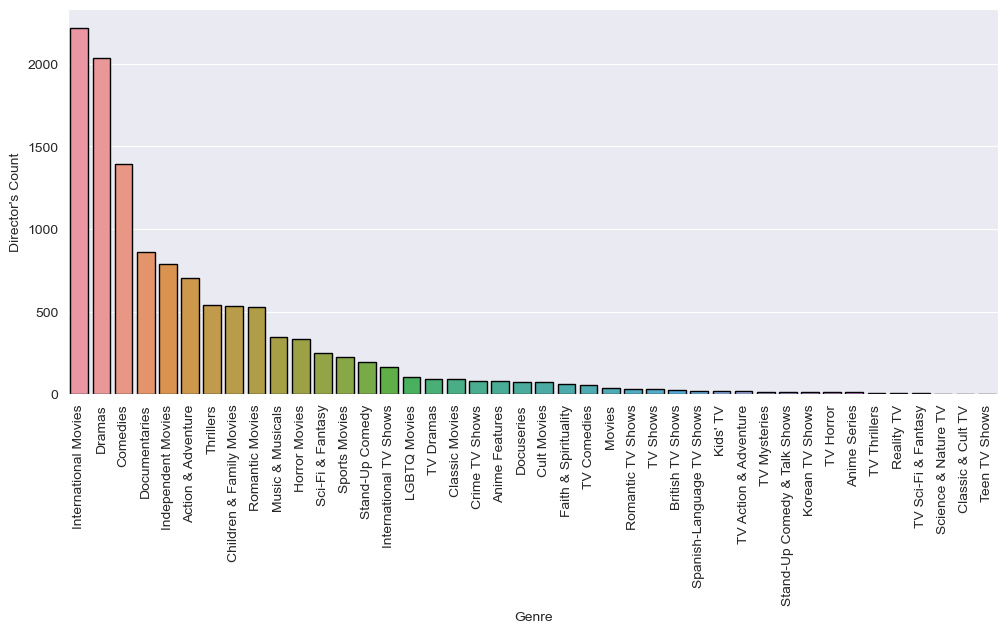

In [314]:
plt.figure(figsize = (12,5))
sns.barplot(data = gd_relation,x = "Genre",y = "Director",ec = "k")
plt.xticks(rotation = 90)
plt.ylabel("Director's Count")
plt.show()

**Insights :**

1.More number of directors directed the International Movies and followed by Dramas.

2.Teen Tv shows was directed by least number of directors.

#### Cast and Genre Relation

In [315]:
cg_relation = final_data.groupby(["Cast"])["Genre"].nunique().to_frame().reset_index()
cg_relation.rename(columns = {"Genre":"Count"},inplace = True)
cg_relation.sort_values(by = "Count",inplace = True,ascending = False)
cg_relation.head()

,Cast,Count
7832,David Attenborough,40
28716,Ron Perlman,17
18153,Kiernan Shipka,16
11174,Gary Cole,16
11641,Glenn Close,15


**Insights :**

1.Actor David Attenborough acted more number of Movies or Tv shows.

2.Some of the Actors are acted only in one Movies or Tv shows.

#### Type and rating Relation

In [316]:
type_rate = final_data.groupby(["type","rating"])["title"].nunique().reset_index()
type_rate.sort_values(by = "title",ascending = False,inplace = True)
type_rate.rename(columns = {"title":"Count"},inplace = True)
type_rate.head()

,type,rating,Count
11,Movie,TV-MA,2064
9,Movie,TV-14,1427
28,TV Show,TV-MA,1147
8,Movie,R,797
26,TV Show,TV-14,733


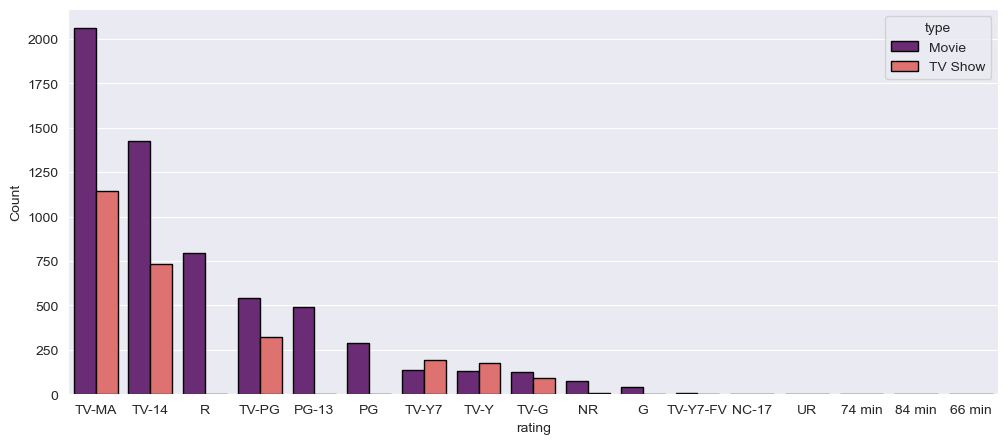

In [317]:
plt.figure(figsize = (12,5))
sns.barplot(data = type_rate,x = "rating",y = "Count",hue = "type",palette = "magma",ec = "k")
plt.show()

**Insights :**

1.Movies and Tv shows are having more number of counts in the TV-MA rating followed by TV-14.

#### Release year and Added Year

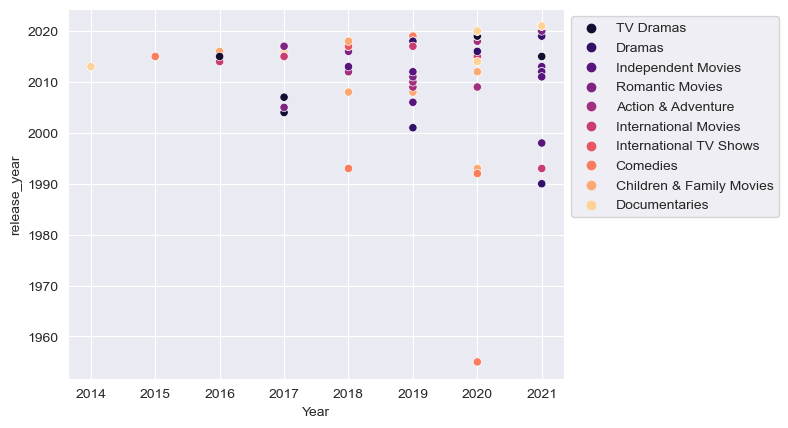

In [318]:
np.random.seed(42)

lists = ["International Movies", "Dramas", "Comedies", "International TV Shows",
         "Documentaries", "Action & Adventure", "TV Dramas", "Independent Movies",
         "Children & Family Movies", "Romantic Movies"]

selected_rows = []
for genre in lists:
    filtered_df = final_data[final_data['Genre'] == genre]
    sampled_rows = filtered_df.sample(n=10, replace=True)  
    selected_rows.append(sampled_rows)

result_df = pd.concat(selected_rows)
result = pd.DataFrame(result_df)

re_year = result.groupby(["release_year", "Year", "Genre"])["title"].nunique().reset_index()
re_year.sort_values(by="Year", ascending=False, inplace=True)

sns.scatterplot(data=re_year, x="Year", y="release_year", hue="Genre", palette="magma")
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

#### Type and Days Relation

In [319]:
type_day = final_data.groupby(["type","Days"])["title"].nunique().reset_index()
type_day.rename(columns = {"title":"Count"},inplace = True)
type_day.sort_values(by = ["Count","Days"],ascending = False,inplace = True)
type_day.head()

,type,Days,Count
0,Movie,Friday,1566
4,Movie,Thursday,1053
7,TV Show,Friday,932
6,Movie,Wednesday,906
5,Movie,Tuesday,852


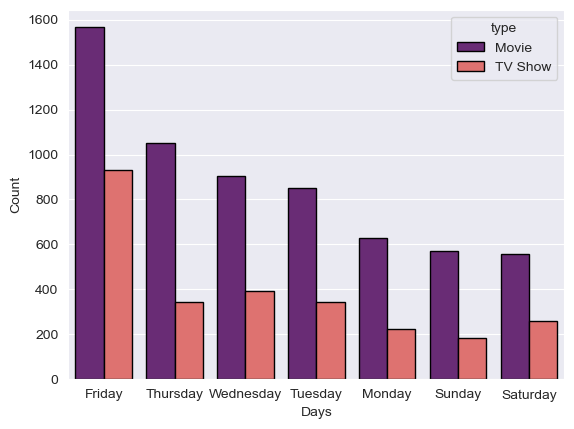

In [320]:
sns.barplot(data = type_day,x = "Days",y = "Count",hue = "type",palette = "magma",ec = "k")
plt.show()

**Insights :**

1.Comparatively Movies are Highly added when compared to Tv shows.

2.In this, Movies are highly added in the days of Friday and Thursday compared to Tv shows.

#### Type and Month relation

In [321]:
type_month = final_data.groupby(["type","Month"])["title"].nunique().reset_index()
type_month.sort_values(by = ["title","Month"],ascending = [False,False],inplace = True)
type_month.rename(columns = {"title":"Count"},inplace = True)
type_month.head(5)

,type,Month,Count
5,Movie,July,565
0,Movie,April,550
2,Movie,December,547
4,Movie,January,546
10,Movie,October,545


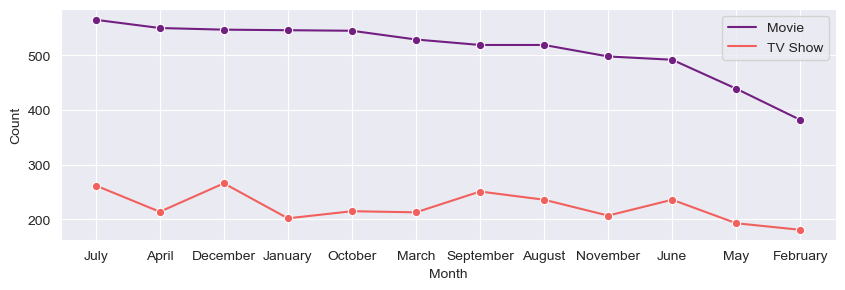

In [322]:
plt.figure(figsize = (10,3))
sns.lineplot(data = type_month,x = "Month",y = "Count",hue = "type",palette = "magma",marker='o')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

**Insights :**

1.Most number of Movies added in the month of July and Tv shows in December.

2.Least number of Movies and Tv shows added in the month February.

#### Country and Release year Relation

In [323]:
country_year = final_data.groupby(["Country","release_year"])["title"].nunique().reset_index()
country_year.rename(columns = {"title":"Count"},inplace = True)
country_year.sort_values(by = ["Count"],ascending = False ,inplace = True)
country_year.head()

,Country,release_year,Count
1074,United States,2018,565
1075,United States,2019,545
1073,United States,2017,508
1076,United States,2020,485
1072,United States,2016,412


**Insights :**

1.United States having Top count on movies released in the year 2018 and followed by 2019.

2.Romaina and Qatar had the least number of movies released.

#### Heatmap Analysis

In [324]:
release_year = final_data.groupby(["release_year","Year"])["title"].nunique().reset_index()
release_year.rename(columns = {"title":"Count"},inplace = True)
release_year.head()

,release_year,Year,Count
0,1925,2018,1
1,1942,2017,2
2,1943,2017,3
3,1944,2017,3
4,1945,2017,3


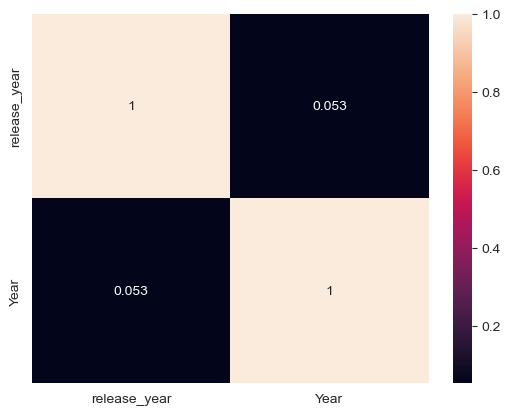

In [325]:
heat_analysis = final_data[["release_year","Year"]].corr()
sns.heatmap(heat_analysis,annot = True)
plt.show()

**Insights :**

Clearly the release year and date added year are not correlated.

### Business Insights :
    
• There are more Movies produced than tvshows by netflix.

• In 25% of countries netflix have produced only 1 tvshow/movies.

• United States of America has highest number of tvshows/movies produced by netflix.

• Almost 75% of directors have directed only 1 shows produced by netflix.

• Almost 65% of actors have acted only 1 shows produced by netflix.

• Netflix has mostly film which are released between 2016 and 2021.

• July and December netflix have added more movies and may and february the least.
• Netflix has been consistent in adding movies after 2005.

• There are more movies/Tvshows in netflix that corresponds to international movies and international TV shows which are not rooted to a particular culture.

• Netflix follows same genre pattern type in Movies and TVShow.

• After 2019 peak there is decrease in number of shows added compared to 2019 which many
attribute to covid or any other external reasons.

• Here in some of the countries we can see the netflix has not added regularly after entering
the countries market.Example : In Panama after 2017 there are no shows added by netflix.

• The actors who have more movies count are having less or nil number of their TVShows
presence.




### Recommendations :

• There are some countries in which Netflix have produced either movies or tvshows only not
both .It is recommended to produce both movies and TVshows to those countries because it
has genres like “International Movies” and “International TvShows” which can be first step
in setting up its brand in those countries.

• Adding consistent content yearly in countries where there is intermittent addition of content
can set Netflix brands in those country.

• Apart from International Movies and International TvShows Genre,Netflix can concentrate
to produce other Genre content relative to the country so that it can have solid foundations
in already established countries.

• Producing TV Shows for actors like Anupam Kher who has most appearance in Movies also
can increase the hype of audience and they would love to see their hero in Reality shows.

• Also producing more movies for good director / good actor even though they did not have
presence before can make actors/directors to be the face of Netflix and can increase its brand
name.Because arround 75% of directors have only 1 shows to their name in netflix.This can
affect people sometimes because the audience are attracted by directors/actors in first place.So
producing repeated directors of good content can help Netflix.

• Since USA have most number of entries,introducing newgenres will recieve welcoming hand
from audience as they are already in bond with Netflix.

• In India,the movie and tvshows ratio differs by 10 times.Introducing more TV shows which
have similar genre of Movies in India can help Netflix.